### The Boston Housing Dataset
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices



### Features:
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

### Used ML Algorithms:
### 1) Linear Regression: computes the linear relationship between the dependent and independent variables
### 2) Lasso regression (regularization by L1 Penalty): Minimize(∑(y i− y i^) 2+α∑∣β j∣)

### 3) Ridge Regression (regularization by L2 penalty): Min(∑(y i− y i^) 2+α∑β j2)

#

# Data Loading and Preprocessing

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
data=pd.read_csv("C:/Users/Hosam/Desktop/Projects/ML/BostonHousing (Linear regression)/HousingData.csv")
data=pd.DataFrame(data)

In [9]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 


### Distribution

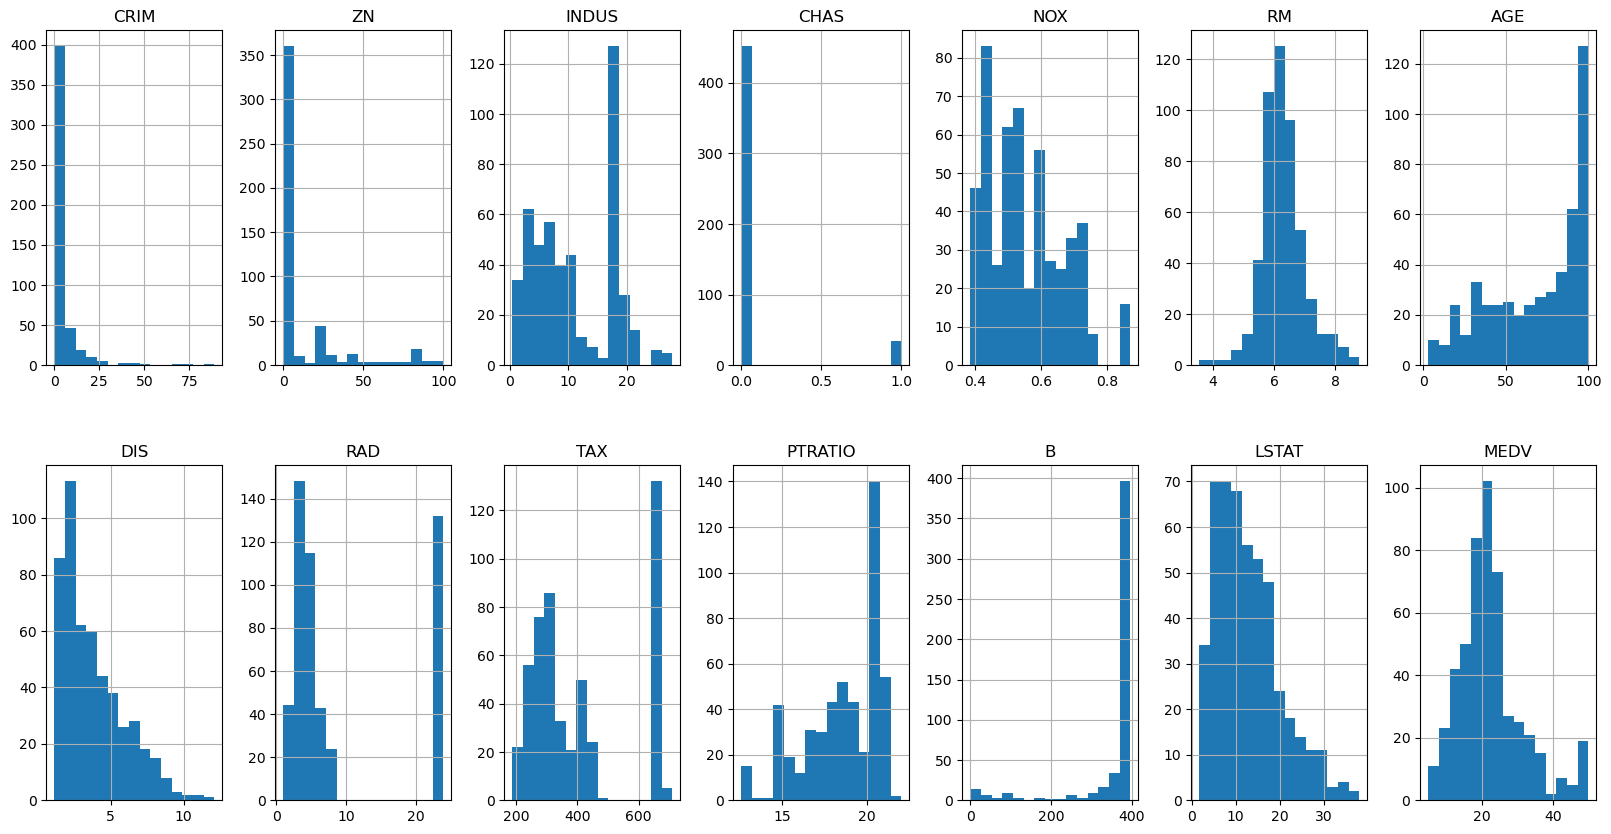

In [25]:
data.hist(bins=15,figsize=(20,10), layout=(2,7))
plt.show()

##### Handling Outliers

In [27]:
#removing outliers using z-score
z_scores = np.abs((data - data.mean()) / data.std())
clean_data = data[(z_scores < 3).all(axis=1)]
print("Shape of data before removing outliers:", data.shape)
print("Shape of data after removing outliers:", clean_data.shape)

Shape of data before removing outliers: (506, 14)
Shape of data after removing outliers: (321, 14)


In [28]:
# Checking for the capped MEDV rows
print("Number of capped MEDV values:", data[data['MEDV'] == 50.0].shape[0])

# Removing capped rows where MEDV is >= 50.0
clean_data = clean_data[~(clean_data['MEDV'] >= 50.0)]
print("Shape of data after removing capped values:", clean_data.shape)


Number of capped MEDV values: 16
Shape of data after removing capped values: (316, 14)


##### Missing Values

In [33]:
# Handling missing values
clean_data = clean_data.dropna()


#

# MODEL

#### Functions to train, visualize and evaluate models

In [38]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}')
    
#function to train models
def train(X_train,X_test,y_train,y_test, name):
    print(f"{name}:\n")
                      
# Linear Regression

    LR=LinearRegression()
    LR.fit(X_train,y_train)
    y_pred_lin = LR.predict(X_test)
    evaluate_model(y_test, y_pred_lin, 'Linear Regression')
                      
#Ridge Regression
    alpha_val=np.logspace(-3,3,100)
    grid={'alpha':alpha_val}
    grid_search=GridSearchCV(Ridge(),grid, scoring='neg_mean_squared_error',cv=5)
    grid_search.fit(X_train,y_train)
    best_ridge_model = grid_search.best_estimator_
    y_pred_ridge = best_ridge_model.predict(X_test)
    evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')



    # Lasso Regression 
    alpha_val=np.logspace(-3,3,100)
    grid = {'alpha': alpha_val}
    grid_search = GridSearchCV(Lasso(),grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_lasso_model = grid_search.best_estimator_
    y_pred_lasso = best_lasso_model.predict(X_test)
    evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')
    print("\n")

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(y_test, y_pred_lin, label='Linear Regression', alpha=0.5)
    axs[0].scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.5)
    axs[0].scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.5)
    axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')
    axs[0].set_title('Actual vs Predicted')
    axs[0].legend()

    # Residuals
    axs[1].scatter(y_test, y_pred_lin - y_test, label='Linear Regression Residuals', alpha=0.5)
    axs[1].scatter(y_test, y_pred_ridge - y_test, label='Ridge Regression Residuals', alpha=0.5)
    axs[1].scatter(y_test, y_pred_lasso - y_test, label='Lasso Regression Residuals', alpha=0.5)
    axs[1].hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r', linestyles='dashed')
    axs[1].set_xlabel('Actual Values')
    axs[1].set_ylabel('Residuals')
    axs[1].set_title('Residuals Plot')
    axs[1].legend()


#

### *Standard Data*

#### Train-Test split

In [43]:
# Split the data into features and target
X = clean_data.drop('MEDV', axis=1)
y = clean_data['MEDV']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Standard Data:

Linear Regression - MSE: 12.70, R2: 0.74
Ridge Regression - MSE: 12.18, R2: 0.75
Lasso Regression - MSE: 12.41, R2: 0.74




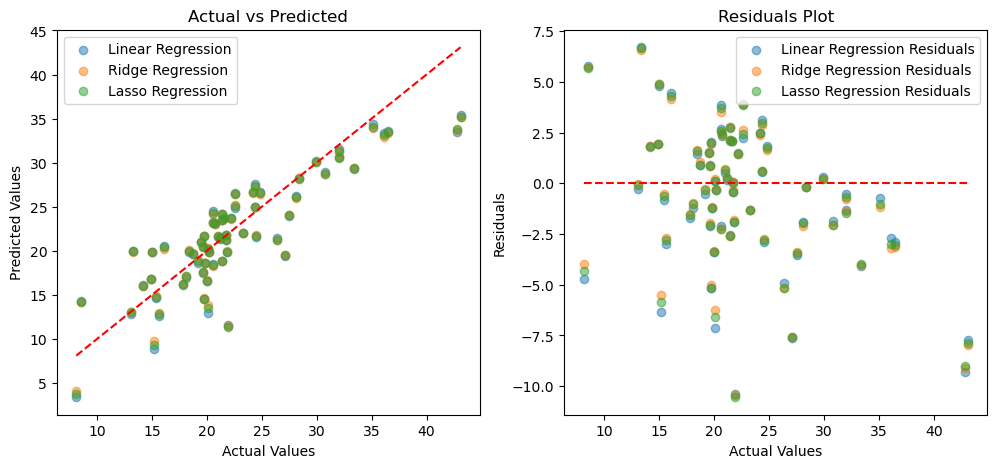

In [45]:
train(X_train, X_test, y_train, y_test,"Standard Data")

### Ridge Regression shows better performance than linear and lasso regression


#

### *Polynomial Features Data*

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


Polynomial Features Data:

Linear Regression - MSE: 7.70, R2: 0.84
Ridge Regression - MSE: 6.73, R2: 0.86


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.659e+02, tolerance: 1.049e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.659e+02, tolerance: 1.099e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+02, toleranc

Lasso Regression - MSE: 6.54, R2: 0.86




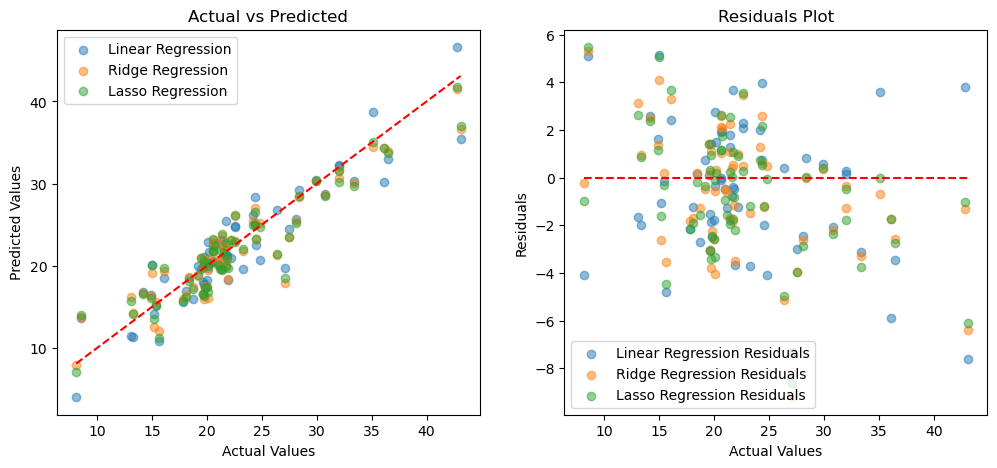

In [50]:
# Original Data with Polynomial Features
train(X_train_poly, X_test_poly, y_train, y_test, "Polynomial Features Data")


### Lasso Regression have lower MSE: 6.54 and hogher R2: 0.86 than Linear Regression and Ridge Regression 

Polynomial Features Data:

Linear Regression - MSE: 128.03, R2: -1.66
Ridge Regression - MSE: 6.43, R2: 0.87


C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.588e+01, tolerance: 1.049e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+02, tolerance: 1.099e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hosam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+02, toleranc

Lasso Regression - MSE: 6.40, R2: 0.87




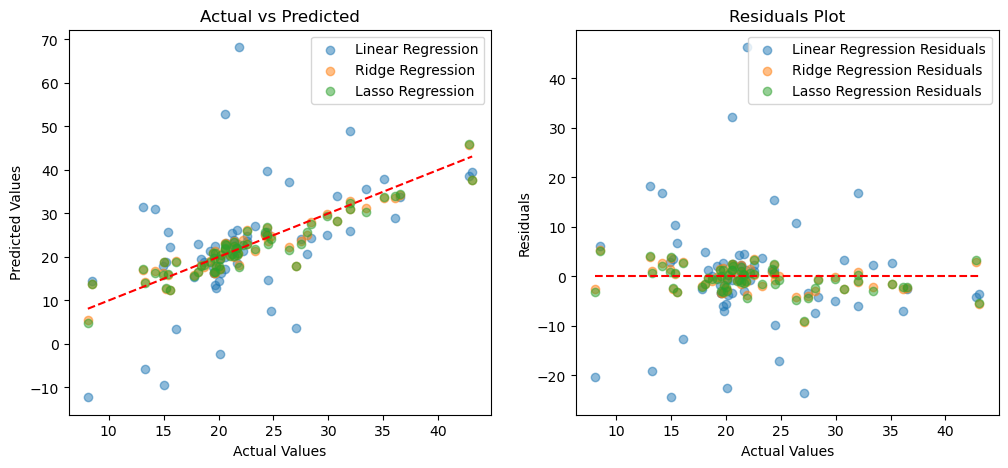

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)
train(X_train_poly, X_test_poly, y_train, y_test, "Polynomial Features Data")


### Increasing polynomial features from 2 to 4 slightly impacted Lasso Regression model performance  positivly:
Lasso Regression - MSE: 6.40, R2: 0.87
